## The Forward Euler Method

Suppose we want to determine the solution $y(t)$ of a differential equation of the form
\begin{equation}
\frac{dy}{dt} = f(y,t)
\end{equation}
where $f(y,t)$ is some function of $y$ and $t$ and we know the value of $y$ at $t=t_0$, $y(t_0)=y_0$. Problems of this sort are known as *initial value* (IV) problems. 

While many IVs have closed form or analytical solutions that we can write down, most do not. Thus, solving these differential equations must be done numerically, with a computer. One of the simplest algorithms for solving such IV problems is the *Forward Euler Method*, which uses the slope of $y(t)$ to determine its value at $y(t+h)$ for small $h$. The approximation made by the Euler method can be understood by writing down the Taylor expansion of $y(t+h)$ to first order. 
\begin{equation}
y(t_n+h) = y(t_n)+h\frac{dy}{dt}|_{t_n} + \mathcal{O}(h^2)
\end{equation}
Thus, we can compute $y(t_n+h)$ given $y(t_n)$ and $\frac{dy}{dt}|_{t_n}$ with the algorithm
\begin{equation}
y_{n+1} = y_n + h f(y_n,t_n)
\end{equation}
which is known as the *Forward Euler method*. Here is an implementation of this algorithm.

In [ ]:
import numpy as np

In [ ]:
#import the numpy library, we are going to be using numpy arrays for our Euler method solution
def forward_euler(f,t0,tf,y0,dt):
    '''
    Compute the solution for the differential equation 
    dy/dt=f(y,t) using the forward Euler method. 
    
    Args:
        f, a function that takes as its argument floats y, t and returns a float. 
        tf, the final time to integrate our equation too.
        y0, starting value of y(t=0)
        dt, step size. 
    Returns:
        
    '''
    npoints=int((tf-t0)/dt)
    output=np.zeros((npoints,2))#initialize an array to store our outputs 
                                #this numpy array has dimensions npointsx2
    output[0,1]=y0
    output[0,0]=t0
    for n in range(1,npoints):
        output[n,1]=output[n-1,1]+dt*f(output[n-1,1],output[n-1,0]) #find y(t_{n+1})
        output[n,0]=output[n-1,0]+dt #increment time
    return output

The line 
```
np.zeros((npoints,2))
``` 
returns a numpy array with shape (npoints, 2), an npoints$\times$2 matrix in which we will store our times in the first column and our solution in the second column. 

Let's test our function on the equation
\begin{equation}
\frac{dy}{dt}=a\times y
\end{equation}
where $a$ is a constant.

This differential equation can be integrated analytically to give the exponential function
\begin{equation}
y(t)= A e^{a t}
\end{equation}
where $A$ is some constant (fixed by $y(t=0)$ ).

First define our function we want to integrate. 

In [ ]:
def f_exp(y,t,a=1.):
    return a*y

When we want to analyze functions, its usually a good idea to plot things. ```matplotlib.pyplot``` is a popular module for plotting numpy arrays. We will also use the magic command ```%matplotlib inline``` which makes sure that are plots display correctly in our notebook. 

## Plotting with matplotlib

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

To make plots, we use the ```plt.plot(x,y,...)``` function. ```plot()``` takes a large number of additional optional arguments after ```x,y```. Some of popular examples include ```label``` which will show up in a legend, ```color``` which sets the line color, ```line-width```, which sets the width of the line, and 

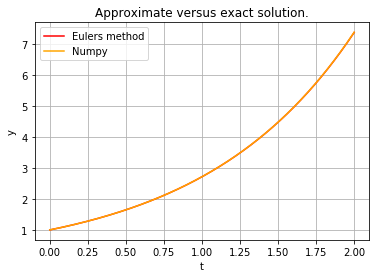

In [ ]:
z=forward_euler(f_exp,y0=1.,t0=0.,tf=2.,dt=1e-3)#Solve differential equation with Euler's method. 

plt.plot(z[:,0],z[:,1],label='Eulers method',color='red')#Plot Euler's method solution. 
plt.plot(z[:,0],np.exp(z[:,0]),label='Numpy',color='orange')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.title('Approximate versus exact solution.')
plt.legend(loc='best')


It looks like our Euler's method is almost exact agreement with the numpy ```exp()``` function. It's a little hard to tell though so lets look at their fractional difference instead. 

In [ ]:
def percent_error(a,b):
    '''
    compute the percent error between a and b
    Args:
        a, float, int, or numpy array
        b, float, int, or numpy array
    Returns:
        the percent error between a and b
    '''
    return 100.*np.abs(1.-a/b)#np.abs(n) calculates the absolute value of a number n

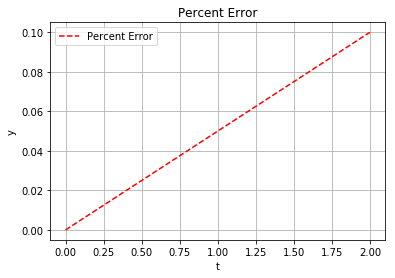

In [ ]:
z=forward_euler(f_exp,y0=1.,t0=0.,tf=2.,dt=1e-3)#Solve differential equation with Euler's method. 

plt.plot(z[:,0],100.*np.abs(1.-np.exp(z[:,0])/z[:,1]),
         label='Percent Error',color='red',linestyle='--')#Plot Euler's method solution. 
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.title('Percent Error')
plt.legend(loc='best')


It looks like our errors are under 0.1%, Not bad! Now let's see how the error depends on step size. 

(0.0001, 10.0)

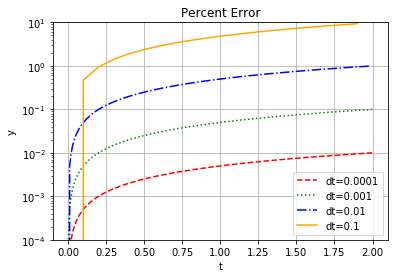

In [ ]:
colors=['red','green','blue','orange']
linestyles=['--',':','-.','-']
dts=[1e-4,1e-3,1e-2,1e-1]
for m in range(len(dts)):
    cl=colors[m]
    ls=linestyles[m]
    dt=dts[m]
    z=forward_euler(f_exp,y0=1.,t0=0.,tf=2.,dt=dt)#Solve differential equation with Euler's method. 
    plt.plot(z[:,0],percent_error(np.exp(z[:,0]),z[:,1]),
             label='dt='+str(dt),color=cl,linestyle=ls)#Plot Euler's method solution. 
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.title('Percent Error')
plt.legend(loc='best')

plt.yscale('log')
plt.ylim(1e-4,1e1)

As we should expect from our discussion, the percent error increases with increasing step size and is roughly proportional to $dt$. Notice that while for small step sizes our errors are small ($\lesssim 1\%$), they increase with time, building up ```accumulated error``` which after sufficient time can be larger than $100\%$.

## Exercise: Runge Kutta Integrator

In lecture, we learned about the RK4 integrator. Implement a function ```rk4(f,t0,tf,y0,dt)``` where ```f``` is a function that takes as its arguments ```y``` and ```t``` such that 
\begin{equation}
\frac{dy}{dt}=f(y,t),
\end{equation}
```y_0``` is the value of $y(t_0)$ and $dt$ is the step-size. The function should return a numpy array with shape ```(nt,2)``` where ```nt``` is the number of steps between ```tf``` and ```t0```. The first column should contain time-steps that are evenly spaced between ```t0``` and ```tf``` and the second column should contain the RK4 estimate of ```y(t)``` at each value of $t$ in the first column. 

Recall that the RK4 integrator computes $y(t_{n+1})$ from $y_n$ at $t_n$ through
\begin{equation}
y_{n+1} = y_n + \frac{1}{6}(k_1 + 2 k_2 + 2 k_3 + k_4)
\end{equation}
where
\begin{align}
k_1&=dt f(y_n,t_n) \\
k_2&=dt f(y_n+k_1/2,t_n+dt/2)\\
k_3&=dt f(y_n+k_2/2,t_n+dt/2)\\
k_4&=dt f(y_n + k_3,t_n+dt)
\end{align}

Now make a plot comparing the percent-error for the RK4 algorithm and the Forward Euler algorithm in solving the equation $dt/dt = 2 y$ between $t=0$ and $t=2$ for step sizes $0.001$,$0.01$ and $0.1$ and $y(t=0) = 1$. Plot the percent errors for RK4 as dashed lines and the percent errors for Forward Euler as dotted lines.  

## Exercise: A Block on a Spring

Suppose you have a block on a spring whose position, $x$, obeys the differential equation
\begin{equation}
\ddot{x} = - \frac{ k }{m} x = - \omega_0^2 x
\end{equation}
Solve this equation numerically given intial conditions $x_0$ and $v_0$ using Runge Kutta or Euler's method. 

In particular, try setting $\omega_0 = 2 \pi$ sec$^{-2}$, $x_0 = $1 m and $v_0 = $0 m/sec. How does the solution you obtain compare to the analytic solution? 

Does the conservation of Energy hold? How does it depend on the step-sizes. 


## Exercise: Pendulum (Bonus).

The equation of motion for a pendulum is 
\begin{equation}
\ddot{\theta} = - \frac{g}{\ell} \sin \theta
\end{equation}
Plot $\theta(t)$ for various times. Compare this to the solution when $\theta << 1$ which gives simple harmonic motion. Plot the Pendulum on the surface of Earth and Jupiter with a length of $\ell=1$. Start the Pendulum at $\theta_0=0.99 \times \pi$ and $\dot{\theta}_0=0$

## Exercise: 2d harmonic oscillator (Bonus). 

Physicists sometimes like to model atoms in a crystalline lattice as a multi-dimensional harmonic oscillator. In this problem we'll study the behavior of this system. The equations of motion in two dimensions are
\begin{equation}
m \ddot{x} = -k_x x
\end{equation}

\begin{equation}
m \ddot{y} = -k_y y
\end{equation}
Solve these differential equations for the initial conditions $v_{0x}, v_{0y}, x_0, y_0$ and plot orbits for various values of $k_x$ and $k_y$. How does the system behave when $x_0 = 0$ and $\dot{x}_0 = 0$ but $\dot{y}_0 = 0$ and $y_0 = 10$ for $\omega_{y0} = \omega$.  What happens when $k_x \neq k_y$. 